In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [324]:
df = df.sample(frac=1).reset_index(drop=True) # To Randomize the data

In [325]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [326]:
df["Pregnancies"]= (df["Pregnancies"]- min(df["Pregnancies"]))/ (max(df["Pregnancies"])- min(df["Pregnancies"]))
df["Glucose"]= (df["Glucose"]- min(df["Glucose"]))/ (max(df["Glucose"])- min(df["Glucose"]))
df["BloodPressure"]= (df["BloodPressure"]- min(df["BloodPressure"]))/ (max(df["BloodPressure"])- min(df["BloodPressure"]))
df["SkinThickness"]= (df["SkinThickness"]- min(df["SkinThickness"]))/ (max(df["SkinThickness"])- min(df["SkinThickness"]))
df["Age"]= (df["Age"]- min(df["Age"]))/ (max(df["Age"])- min(df["Age"]))
df["Insulin"]= (df["Insulin"]- min(df["Insulin"]))/ (max(df["Insulin"])- min(df["Insulin"]))
df["BMI"]= (df["BMI"]- min(df["BMI"]))/ (max(df["BMI"])- min(df["BMI"]))

In [327]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.471876,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.331329,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.243750,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.372500,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.626250,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.420000,1.000000,1.000000


In [328]:
#Features in X and target variable in Y
X=df.iloc[:,:8]
Y=df.iloc[:,8:9]

## Train Test Split

In [329]:
split_value = round(len(df)-(len(df) *0.25))

x_train =  np.array(X[:split_value])  # mxn
x_test  =  np.array(X[split_value:]) # mxn
y_train =  np.array(Y[:split_value]) # mx1
y_test  =  np.array(Y[split_value:]) # mx1

# Logistic Regression Model

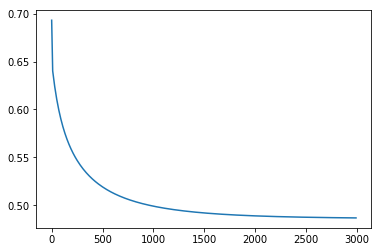

[[109   5]
 [ 32  46]]


In [330]:
class Logistic_Regression:
    
    def __init__(self,learning_rate=0.001, Iteration=1000):
        
        self.learning_rate = learning_rate
        self.Iteration = Iteration
        self.Intercept = 0
    
    def Hypothesis_func(self,x_train):
        
        Z = np.dot(x_train,self.slope) + self.Intercept  #slope: nx1    x_train: mxn  Z: mx1
        return Z
    
    def sigmoid(self,Z):
        
        h = 1/ (1+ np.exp((-Z))) # h: mx1
        return h
    
    def Cost_function(self,h,y_train):
        
        m=y_train.shape[0]
        J = (1/m)*(np.dot(((-1)*(y_train).transpose()),np.log(h)) - np.dot((1-y_train).transpose(),np.log(1-h))) # y__train : 1xm h
        return J
    
    def Gradient_descent(self,h,y_train,x_train):
        
        m=y_train.shape[0]
        dw = (1/m)*np.dot(x_train.transpose(),(h-y_train)) # dw : nx1    y_train: mx1   x__train.transpose: nxm
        db = (1/m)* np.sum(h-y_train)
        
        self.slope = self.slope - (self.learning_rate*dw)  # self.slope: nx1
        self.Intercept = self.Intercept - (self.learning_rate*db)
        
    
    def fit(self,x_train,y_train):
        self.slope=np.zeros((x_train.shape[1],1))  # nX1
        c=[]
        it=[]
        
        for i in range(self.Iteration):
            
            Z = self.Hypothesis_func(x_train) #mx1
            
            h = self.sigmoid(Z) # mx1
            
            J = self.Cost_function(h,y_train) # h: mx1  y_train: mx1
            
            a=self.Gradient_descent(h,y_train,x_train) # h: mx1 ; y_train: mx1 ; x_train: mxn
            
            if(i%10==0):
                c.append(J[0][0])
                it.append(i)

        plt.plot(it,c) 
        plt.show()
    
    def predict(self,x_test):
        y_pred = np.dot(x_test,self.slope) + self.Intercept # x_test: mxn self.slope:nx1
        y_pred= self.sigmoid(y_pred)
        new=[]
        y_pred = [new.append([1]) if i>0.5 else new.append([0]) for i in y_pred]
        return new

Lg = Logistic_Regression(learning_rate=0.6,Iteration=3000)
Lg.fit(x_train,y_train)
y_p=Lg.predict(x_test)

from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test,y_p)
print(results)


## Comparision with Scikit-Learn

In [331]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
L.fit(x_train,y_train)
y_p = L.predict(x_test)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test,y_p)
print(results)

[[112   2]
 [ 40  38]]


C:\Users\Shashank Mittal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
